# The Grocery Delivery Opportunity: Exploratory Analysis

In this notebook, I disclose how I constructed the charts to support my analysis.

In [2]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

%matplotlib inline

In [3]:
order_products_train = pd.read_csv("input/order_products__train.csv")
order_products_prior = pd.read_csv("input/order_products__prior.csv")
orders = pd.read_csv("input/orders.csv")
products = pd.read_csv("input/products.csv")
aisles = pd.read_csv("input/aisles.csv")
departments = pd.read_csv("input/departments.csv")

Text(0.5, 1.0, 'Frequency Distribution by Days Since Prior Order')

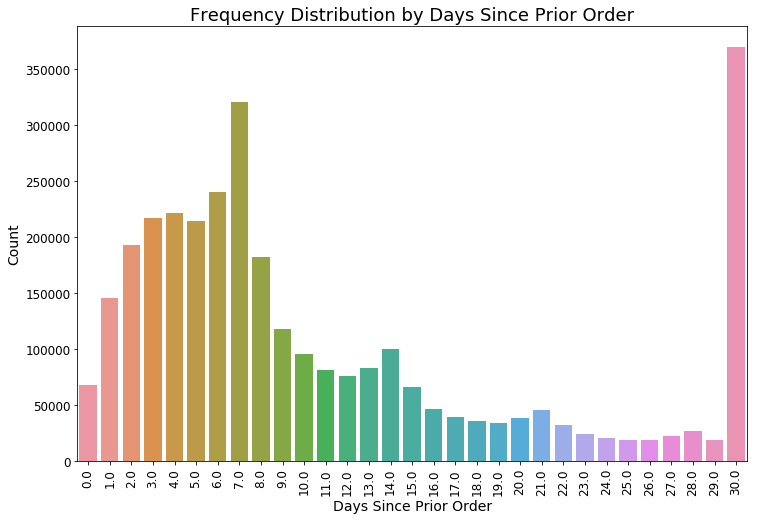

In [20]:
plt.figure(figsize=(12,8))
sns.countplot(x='days_since_prior_order', data=orders)

plt.ylabel('Count', fontsize=14)
plt.xlabel('Days Since Prior Order', fontsize=14)
plt.xticks(rotation='vertical', fontsize=12)
plt.yticks(fontsize=12)

plt.savefig('reorder_days.png', bbox_inches='tight')


plt.title('Frequency Distribution by Days Since Prior Order', fontsize=18)

As shown, the distribution is heavily right skewed with the majority of customers reordering within 10 days. The below calculations demonstrate that ~59% of customers reorder within 10 days. 

In [5]:
order_within_ten = orders['days_since_prior_order'][ orders['days_since_prior_order'] <= 10 ].count()
total_orders = len(orders['days_since_prior_order'])
order_within_ten / total_orders

0.589031017370815

Interestingly, we also see large peaks around each week. For example, we can see the many customers seem to reorder on a weekly cadence. To approximate how many, I totalled reorders within 6-8, 13-15, 20-22, and 27-29 days. 

In [6]:
weekly = [6.0, 7.0, 8.0, 13.0, 14.0, 15.0, 20.0, 21.0, 22.0, 27.0, 28.0, 29.0]
def weekly_num(x):
    if float(x) in weekly:
        return True
    else:
        return False

weekly_orders = orders['days_since_prior_order'].apply(weekly_num).sum()
weekly_order_percent = weekly_orders / total_orders
weekly_order_percent

0.3438533937937197

## Average Numbers of Items per Order

In [7]:
order_products = pd.concat([ order_products_prior, order_products_train ])
order_products.shape

(33819106, 4)

In [8]:
order_products.columns.tolist()

['order_id', 'product_id', 'add_to_cart_order', 'reordered']

In [9]:
order_products['add_to_cart_order'].nunique()

145

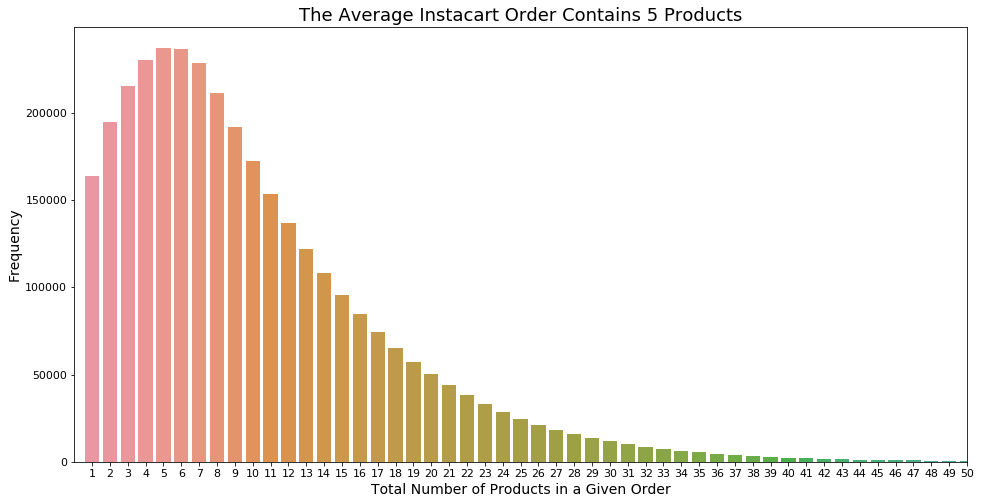

In [10]:
max_cart = order_products.groupby('order_id')['add_to_cart_order'].aggregate(np.max).reset_index()
max_cart = max_cart['add_to_cart_order'].value_counts()

plt.figure(figsize=(16,8))
sns.barplot(max_cart.index, max_cart.values)
plt.ylabel('Frequency', fontsize=14)
plt.xlabel('Total Number of Products in a Given Order', fontsize=14)
plt.title('The Average Instacart Order Contains 5 Products', fontsize=18)
plt.xticks(fontsize=11)
plt.yticks(fontsize=11)
plt.xlim(-1,49)

plt.savefig('average_order_count.png', bbox_inches='tight')

plt.show()

# Product Sales by Aisle

In [11]:
aisles.columns.tolist()

['aisle_id', 'aisle']

In [12]:
order_products.columns.tolist()

['order_id', 'product_id', 'add_to_cart_order', 'reordered']

In [13]:
products.columns.tolist()

['product_id', 'product_name', 'aisle_id', 'department_id']

In [14]:
product_aisles = pd.merge(order_products, pd.merge(products, aisles))
product_aisles.shape

(33819106, 8)

In [15]:
product_aisles.head()

,order_id,product_id,add_to_cart_order,reordered,product_name,aisle_id,department_id,aisle
0,2,33120,1,1,Organic Egg Whites,86,16,eggs
1,26,33120,5,0,Organic Egg Whites,86,16,eggs
2,120,33120,13,0,Organic Egg Whites,86,16,eggs
3,327,33120,5,1,Organic Egg Whites,86,16,eggs
4,390,33120,28,1,Organic Egg Whites,86,16,eggs


In [16]:
top_aisles = product_aisles['aisle'].value_counts()[:20]
top_aisles.head()

fresh fruits                  3792661
fresh vegetables              3568630
packaged vegetables fruits    1843806
yogurt                        1507583
packaged cheese               1021462
Name: aisle, dtype: int64

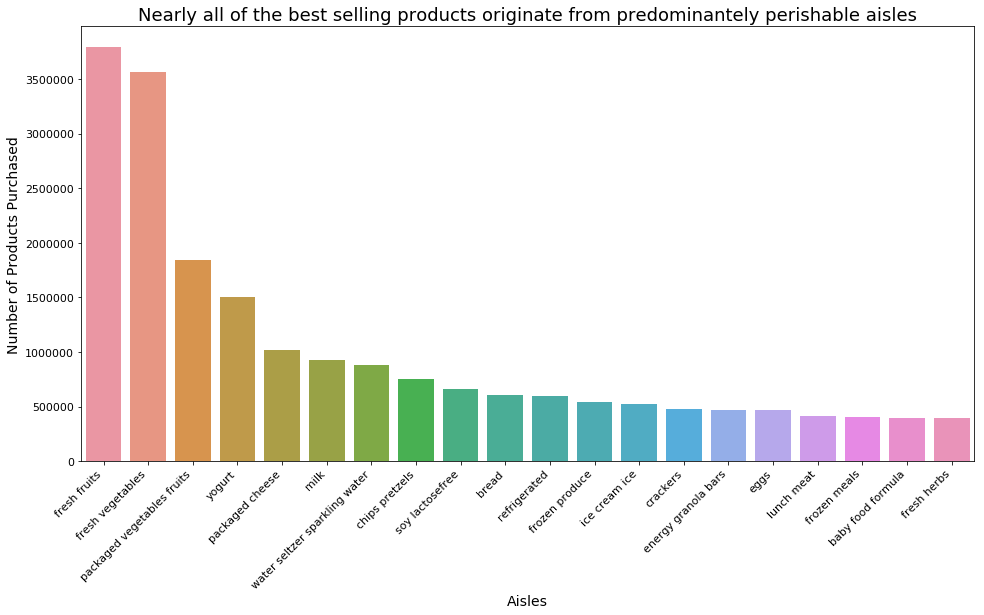

In [19]:
plt.figure(figsize=(16,8))
sns.barplot(top_aisles.index, top_aisles.values)
plt.xlabel('Aisles', fontsize=14)
plt.ylabel('Number of Products Purchased', fontsize=14)
plt.title('Nearly all of the best selling products originate from predominantely perishable aisles', fontsize=18)
plt.xticks(rotation=45, fontsize=11, ha='right')
plt.yticks(fontsize=11)

plt.savefig('top_aisles.png', bbox_inches='tight')

plt.show()

Conservatively, just 6 of the top 20 aisles--chips, water, crackers, energy bars, baby formula, herbs--contain products that are predominantely not perishable (e.g., short shelf life, require cooling).

On a volume basis the persihable aisles account for an even greater share of volume. 

In [18]:
top_20 = top_aisles.sum()

non_perishable = ['water seltzer sparkling water', 
                  'chips pretzels', 
                  'crackers', 
                  'energy granola bars', 
                  'baby food formula', 
                  'fresh herbs']

non_per_total = 0
for x in non_perishable:
    non_per_total += top_aisles[x].sum()

non_per_total / top_20

0.1664964737216121

The Grocery Delivery Opportunity (Based on 3 Million Instacart Orders)

Groceries are a $X trillion dollar market in the United States. To date the industry has been insulated from the technology-driven disruption that has upended other consumer markets (e.g., retailers, hospitality, content producers). Activity over the past 24 months suggests that the industry is approaching an inflection point:

•	Amazon invests heavily: Amazon Go, Whole Foods acquisition, Amazon Fresh
•	Instacart gains momentum: Now valued at $XXB, Instacart has recently formed partnerships with large incumbents (e.g., XXX, XXX) 
•	Wal-Mart and Target Join the fun: Target acquires Shipt, Wal-Mart rolls out online grocery in a major way 

Most of this activity is centered around building grocery delivery businesses (and curbside pickup) on top of existing grocery businesses. While these businesses clearly fulfill a priority job to be done for some customers (convenience), the business model as implemented is flawed and unlikely to position companies for sustainable long-term growth. 

To explain why the current grocery delivery model is flawed it will be helpful to draw upon publicly available data that represents three million Instacart orders. 

A few quick notes on the Instacart data: it is from 20XX-20XX, Instacart released the data as part of a Machine Learning Competition, the dataset is not exhaustive and thus not perfectly representative of Instacart’s business. Further, the dataset includes only customers who have placed between 4 and 100 Instacart orders. Finally, it’s important to consider that Instacart’s business likely skews toward millennial households with comfortable incomes living urban areas. I encourage readers to treat the below charts as directional. 

1.	The layout of existing Grocery Stores are poorly suited for delivery

2.  Delivery customers buy ~X fewer items per order than in-person customers

3.  Nearly every order of 5+ items contains ‘long-tail’ products requiring a large selection

4.  Nearly every order contains perishable items


Together, these insights from the data demonstrate that the cost structure and delivery model of existing grocery businesses are poorly suited to the delivery business. As history shows, successfully breaking into the grocery business nearly always requires adopting a new cost structure which is impossible for incumbents to mirror. Nearly every new entrant has followed a variant of this strategy: 
•	Aldi: Extremely limited selection (less than 3k SKUs), small stores, warehouse style stocking. 
•	Trader Joe’s: Limited name brands, small stores, limited selection
•	Costco/BJ’s/Sam’s Club: Membership, warehouse style, large quantities
•	Whole Foods: Expensive health/environment focused products, prepared foods
•	Dollar General: Limited selection, extreme cost cutting

What could a model with a disruptive cost structure look like? 


In [21]:
product_aisles.columns.tolist()

['order_id',
 'product_id',
 'add_to_cart_order',
 'reordered',
 'product_name',
 'aisle_id',
 'department_id',
 'aisle']

In [26]:
product_counts = product_aisles.groupby('product_name')['product_id'].agg('count')

In [31]:
top_1000 = product_counts.nlargest(n=1000)
top_10000 = product_counts.nlargest(n=10000)

In [29]:
len(product_counts)

49685

In [35]:
product_counts[:5]

product_name
#2 Coffee Filters                         799
#2 Cone White Coffee Filters               14
#2 Mechanical Pencils                       9
#4 Natural Brown Coffee Filters           247
& Go! Hazelnut Spread + Pretzel Sticks    174
Name: product_id, dtype: int64

In [36]:
bottom_48000 = product_counts[1000:]
bottom_39000 = product_counts[10000:]

In [42]:
bottom_48000 = bottom_48000.to_frame().reset_index()

In [45]:
product_aisles.groupby('order_id')['product_name']